In [98]:
import pandas as pd
from pandas import DataFrame, Series

In [99]:
cd "C:\MyFiles\ipython_workspace\project1"

C:\MyFiles\ipython_workspace\project1


In [100]:
train_frame = pd.read_csv('train.csv')

In [101]:
train_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
train_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

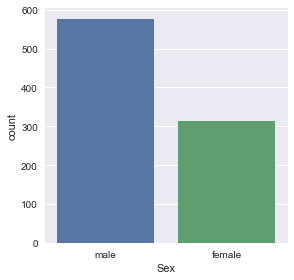

In [104]:
sns.factorplot(x='Sex',data=train_frame,kind='count')

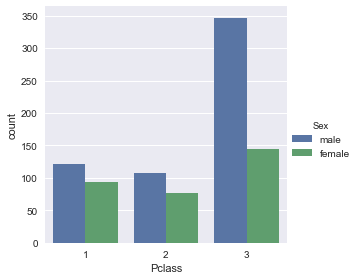

In [105]:
sns.factorplot(x='Pclass',hue='Sex',data=train_frame,kind='count')

In [106]:
def male_famel_child(p):
    age,sex = p
    
    if age < 16:
        return 'child'
    else:
        return sex

In [107]:
train_frame['Person'] = train_frame[['Age','Sex']].apply(male_famel_child, axis=1)

In [108]:
train_frame[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


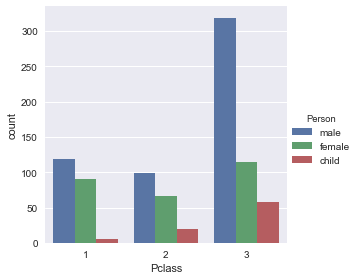

In [109]:
sns.factorplot('Pclass', data=train_frame, hue='Person', kind='count')

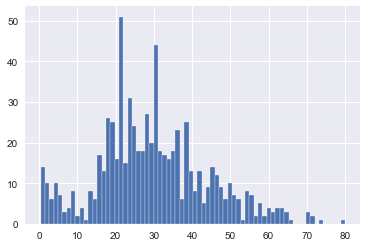

In [110]:
train_frame['Age'].hist(bins=70,edgecolor='w')

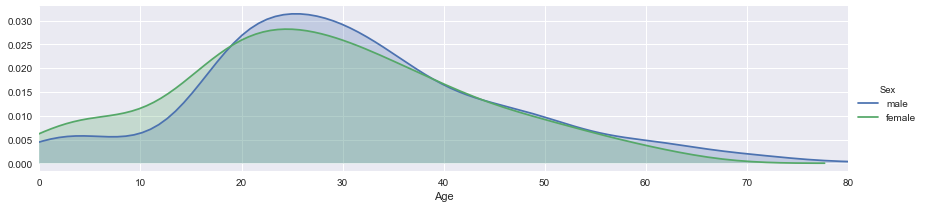

In [111]:
g = sns.FacetGrid(train_frame,hue='Sex',aspect=4)
g = g.map(sns.kdeplot, 'Age', shade=True)
oldest = train_frame['Age'].max()
g.set(xlim=(0,oldest))
g.add_legend()

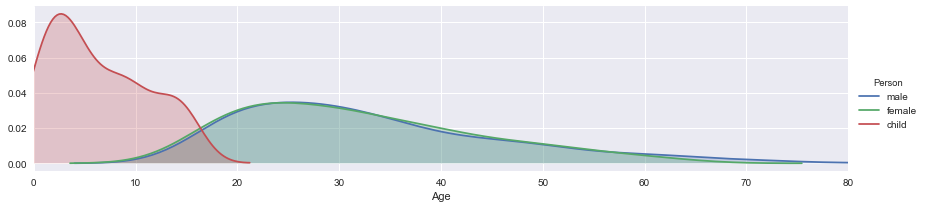

In [112]:
g = sns.FacetGrid(train_frame,hue='Person',aspect=4)
g = g.map(sns.kdeplot, 'Age', shade=True)
oldest = train_frame['Age'].max()
g.set(xlim=(0,oldest))
g.add_legend()

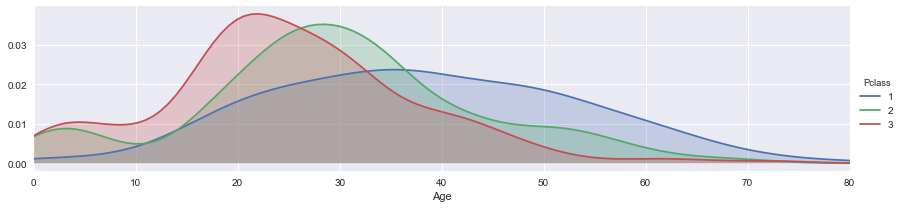

In [113]:
g = sns.FacetGrid(train_frame,hue='Pclass',aspect=4)
g = g.map(sns.kdeplot, 'Age', shade=True)
oldest = train_frame['Age'].max()
g.set(xlim=(0,oldest))
g.add_legend()

In [114]:
train_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [115]:
deck = train_frame['Cabin'].dropna()

In [116]:
levels = []
for row in deck:
    levels.append(row[0])

In [117]:
deck_df = DataFrame(levels)
deck_df.columns = ['Cabin']
deck_df = deck_df.sort_values('Cabin')

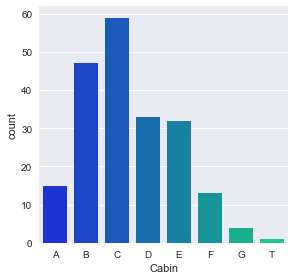

In [118]:
sns.factorplot('Cabin',data=deck_df,kind='count',palette='winter')

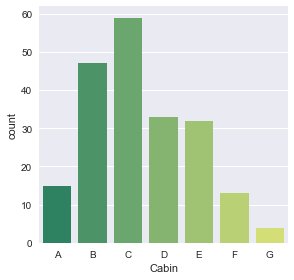

In [119]:
deck_df = deck_df[deck_df.Cabin != 'T']
sns.factorplot('Cabin',data=deck_df,kind='count',palette='summer')

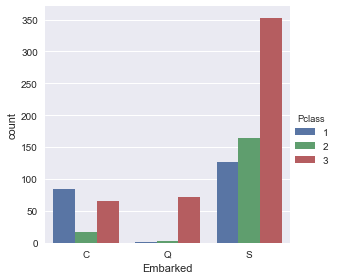

In [120]:
sns.factorplot('Embarked',data=train_frame,hue='Pclass',kind='count',order=['C','Q','S'])

In [121]:
train_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [122]:
train_frame['Alone'] = train_frame.SibSp + train_frame.Parch

In [123]:
train_frame['Alone'].loc[train_frame['Alone'] > 0] = 'Alone'
train_frame['Alone'].loc[train_frame['Alone'] == 0] = 'With Family'

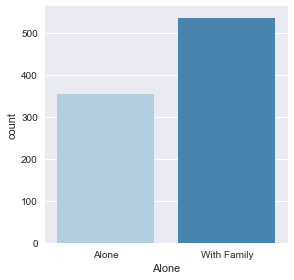

In [124]:
sns.factorplot('Alone', data=train_frame, kind='count', palette='Blues')

In [125]:
train_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,With Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,With Family


In [126]:
train_frame['Survivor'] = train_frame['Survived'].map({0:'No',1:'Yes'})

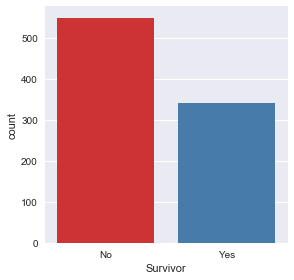

In [127]:
sns.factorplot('Survivor',data=train_frame,kind='count',palette='Set1')

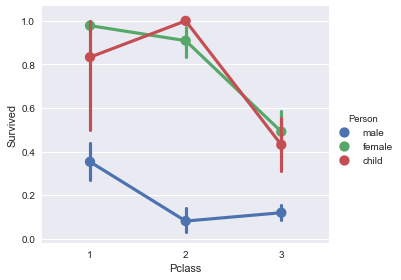

In [128]:
sns.factorplot('Pclass','Survived',hue='Person',data=train_frame,aspect=1.2)

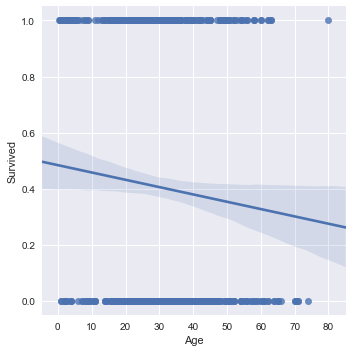

In [129]:
sns.lmplot('Age', 'Survived', data=train_frame)

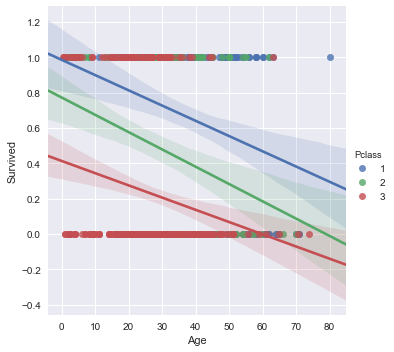

In [130]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=train_frame)

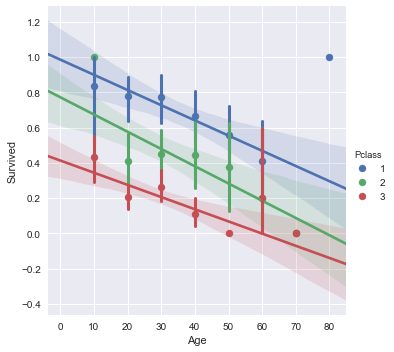

In [131]:
generation = [10,20,30,40,50,60,70,80]
sns.lmplot('Age','Survived',data=train_frame,hue='Pclass',x_bins=generation)

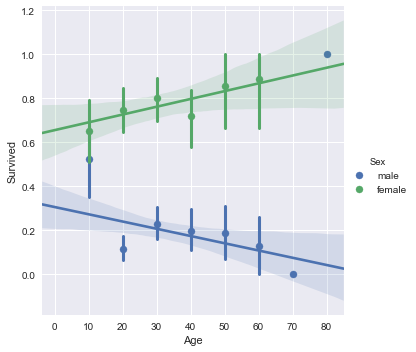

In [132]:
sns.lmplot('Age','Survived', hue='Sex',data=train_frame,x_bins=generation)

In [146]:
deck_nonnull = train_frame
deck_nonnull = deck_nonnull.dropna(subset=['Cabin'])

In [147]:
deck_copy = deck

In [148]:
for row in deck_copy.iteritems():
    deck_copy[int(row[0])] = row[1][0]

In [150]:
deck_copy.rename('Deck', inplace=True)

1      C
3      C
6      E
10     G
11     C
21     D
23     A
27     C
31     B
52     D
54     B
55     C
61     B
62     C
66     F
75     F
88     C
92     E
96     A
97     D
102    D
110    C
118    B
123    E
124    D
128    F
136    D
137    C
139    B
148    F
      ..
751    E
759    B
763    B
765    D
772    E
776    F
779    B
781    B
782    D
789    B
796    D
802    B
806    A
809    E
815    B
820    B
823    E
829    B
835    E
839    C
849    C
853    D
857    E
862    D
867    A
871    D
872    B
879    C
887    B
889    C
Name: Deck, dtype: object

In [153]:
deck_nonnull = pd.concat([deck_nonnull, deck_copy], axis=1)

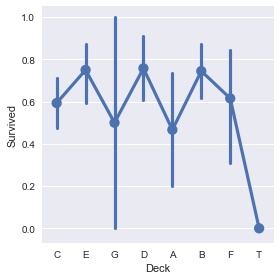

In [154]:
sns.factorplot('Deck','Survived',data=deck_nonnull)

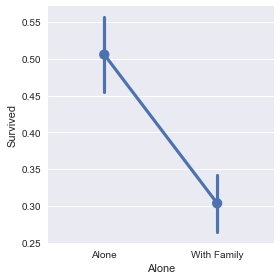

In [156]:
sns.factorplot('Alone', 'Survived',data=train_frame)